In [146]:
import librosa
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from IPython.display import Audio, display


import soundfile as sf
from audiomentations import Compose, PitchShift, Reverse, Limiter, AddGaussianNoise, TanhDistortion
from sklearn.preprocessing import MinMaxScaler

In [130]:
def random_sound(classtype, path="DATA_12-1-2023/DATASET/TEST"):
    folder_path = os.path.join(path, classtype)

    file_name = random.sample(os.listdir(folder_path), 1)[0]
    file_dir = os.path.join(folder_path, file_name)
    audio, sr = librosa.load(file_dir, sr=None)
    audio = audio[int(0.3*sr):int(0.5*sr)]
    print(f"File: {file_name.replace('.wav', '')}")
    return audio, sr

def play_sound(audio):
    return display(Audio(audio, rate=44100))

In [168]:
def augument_sound(audio, sr):
    augment = Compose([
        Reverse(p=1), Limiter(p=0.5),
        PitchShift(min_semitones=-2, max_semitones=2, p=1),
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.002, p=0.5),
        TanhDistortion(min_distortion=0.01, max_distortion=0.5, p=0.5),
])
    return augment(samples=audio, sample_rate=sr)

File: TEST_OK_61


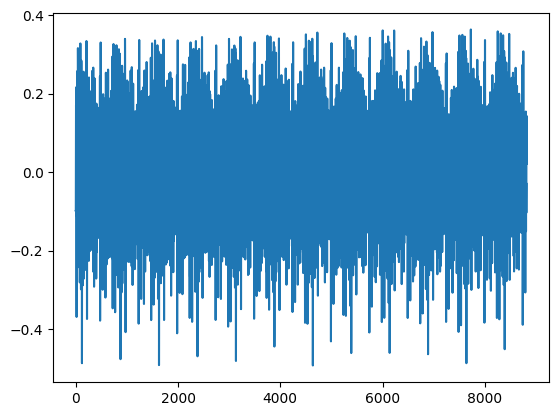

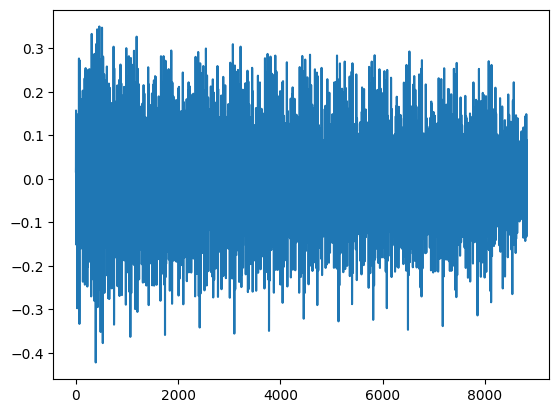

File: TEST_OK_201


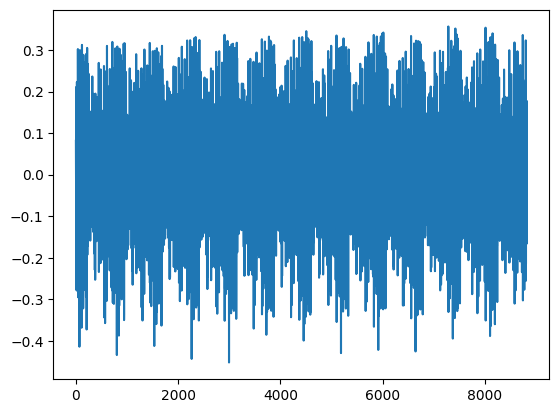

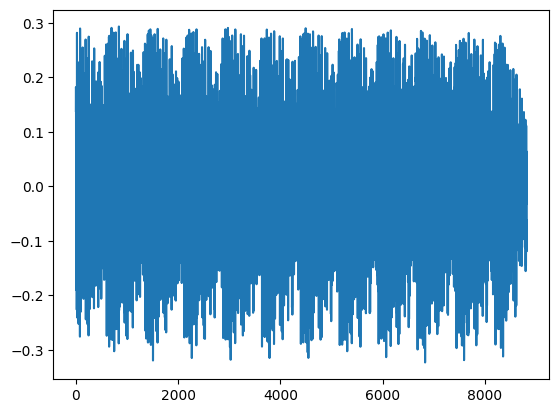

File: TEST_OK_10


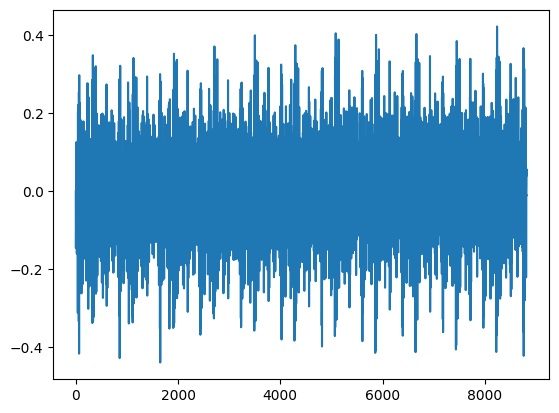

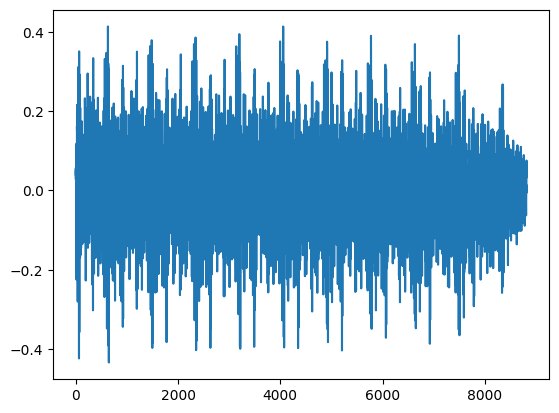

File: TEST_OK_63


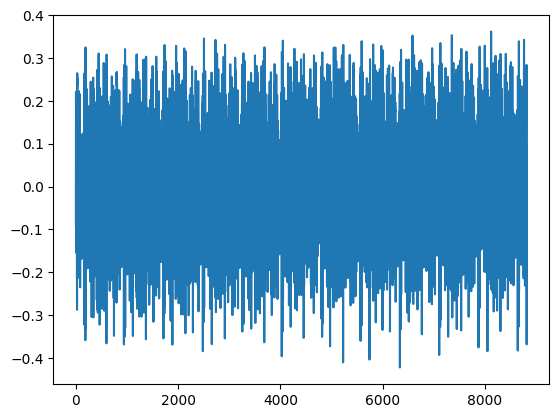

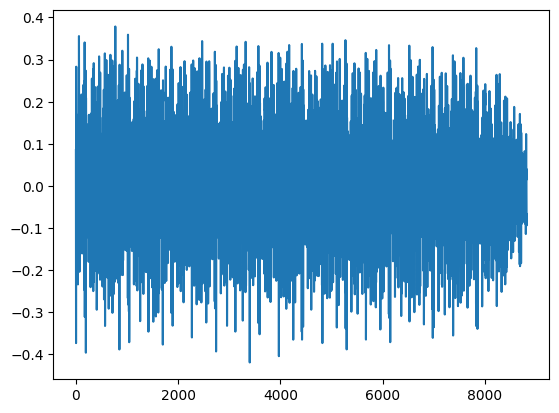

File: TEST_OK_18


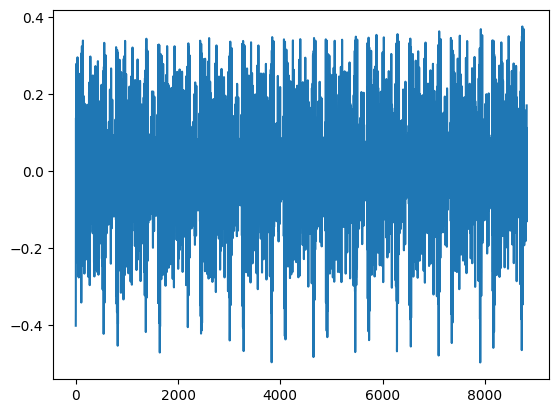

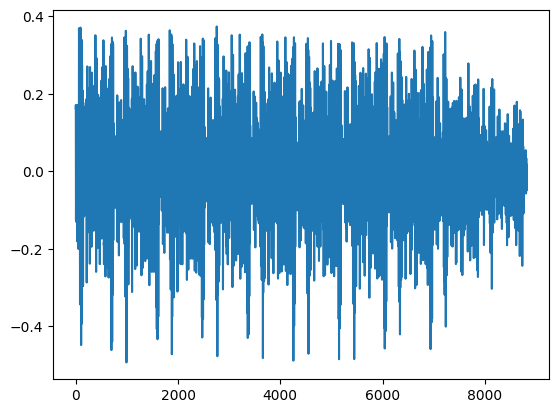

In [169]:
for _ in range(5):
    audio, sr = random_sound("OK")
    plt.plot(audio)
    plt.show()
    
    audio_ag = augument_sound(audio, sr)
    plt.plot(audio_ag)
    plt.show()
    play_sound(audio)
    play_sound(audio_ag)

File: NG_TEST_FULL_123


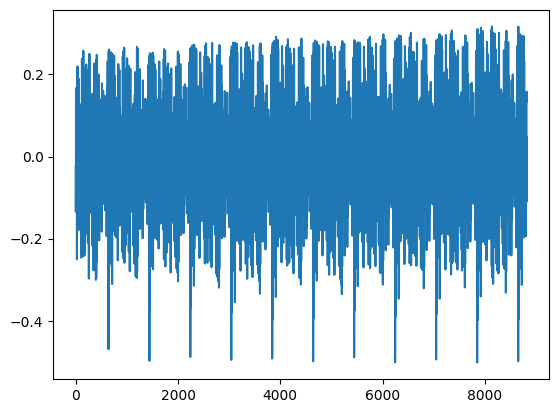

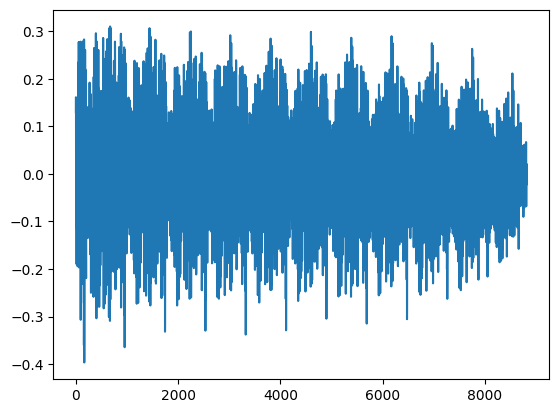

File: NG_TEST_FULL_95


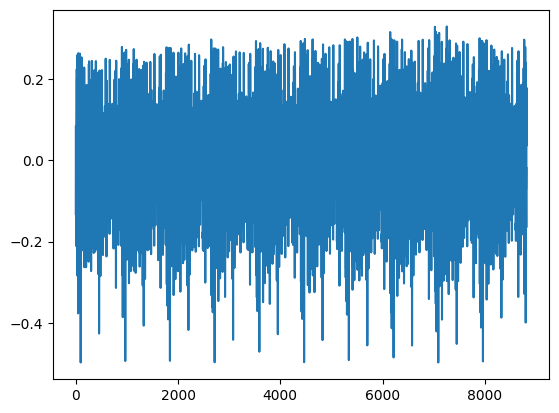

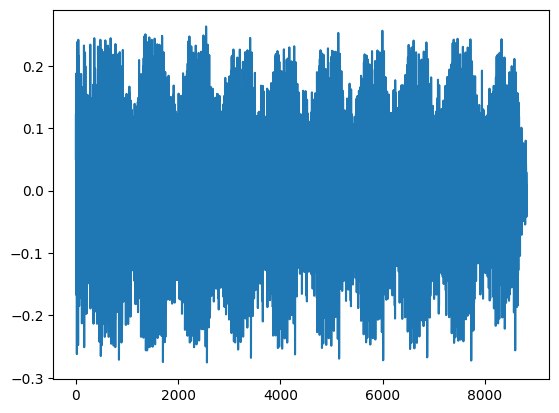

File: NG_TEST_FULL_106


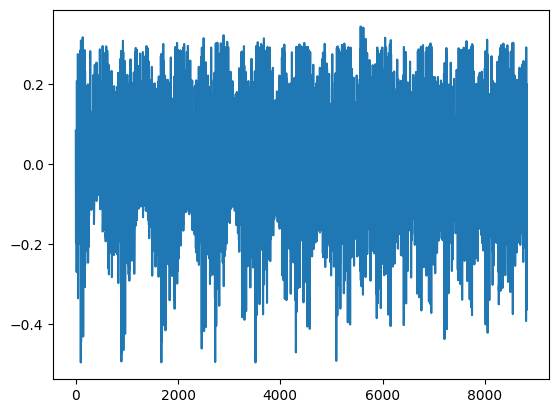

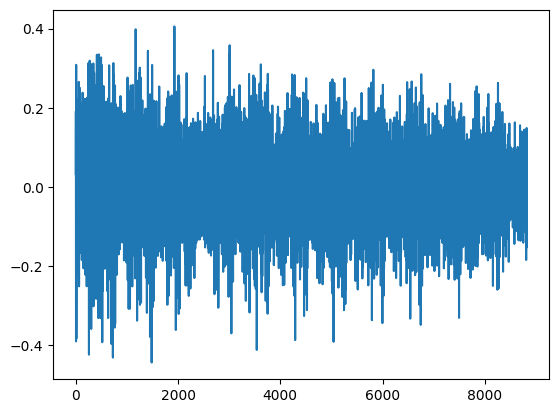

File: NG_TEST_FULL_40


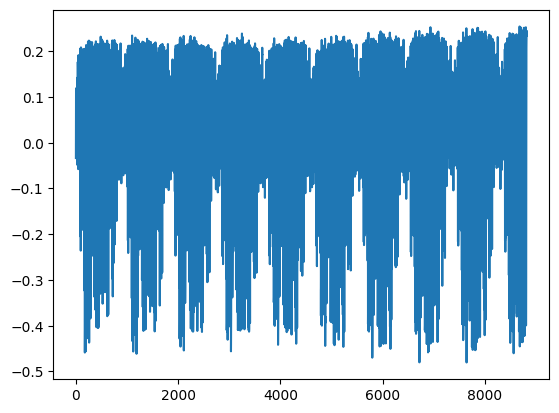

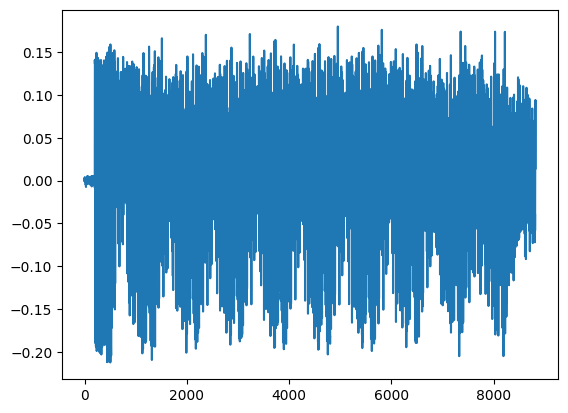

File: NG_TEST_FULL_131


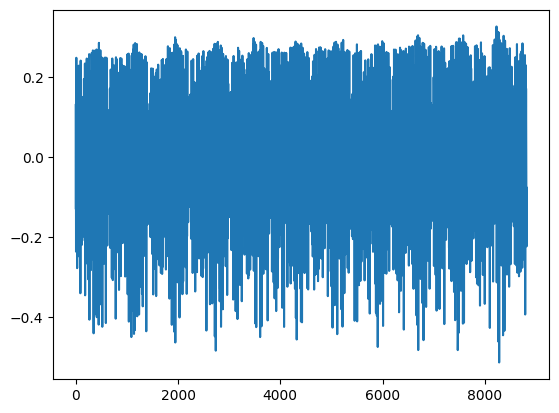

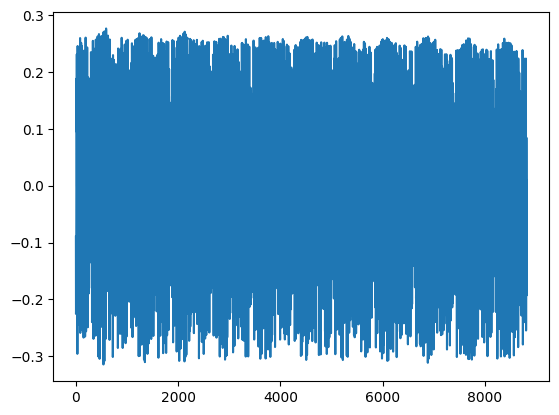

In [170]:
for _ in range(5):
    audio, sr = random_sound("NG")
    plt.plot(audio)
    plt.show()
    
    audio_ag = augument_sound(audio, sr)
    plt.plot(audio_ag)
    plt.show()
    play_sound(audio)
    play_sound(audio_ag)